In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Example: Insurance Payouts

As a more concrete example, suppose that an insurance company pays out $N\sim \textrm{Poisson}(10)$ claims per week and the payout for each claim is $X_i \sim \textrm{Exp}(\lambda_i)$, where each $\lambda_i$ is a positive constant.  (Suppose that each $N$ and all of the $X_i$ are mutually independent.)  The total amount that the insurance company needs to pay out each week is given by

$$X = \sum_{i = 1}^{N}X_i$$

(Where an empty sum is defined as zero.)  We can generate $X$ with the following steps:

1) Generate $N$ from a Poisson distribution using the inverse transform method.

2) If $N = n$, generate $L_1(\lambda_1)$, $\dotsc$, $L_n(\lambda_n)$ using the inverse transform method.

It can be used as a prediction for next week, and we generate N examples.

In [17]:
lam = 10

def generate_poisson(lam):
    n = 0
    p = np.exp(-lam)
    f = p
    u = np.random.uniform(0,1)
    while u > f:
        p = (lam * p)/(n+1)
        f += p
        n += 1
    x = n
    return n

lam1 = 5
n_claims = generate_poisson(lam)

N = 100000
x_total = np.zeros(N)

for k in range(N):
    x_each = 0
    for i in range(n_claims):
        u = np.random.uniform(0, 1)
        x = - np.log(u)/lam
        x_each += x
    x_total[k] = x_each

x_mu = np.mean(x_total)
x_sigma = np.std(x_total)
print("The mean of the weekly insurance payout is {}".format(x_mu))
print("The standard deviation of the weekly insurance payout is {}".format(x_sigma))

The mean of the weekly insurance payout is 0.6997981819703328
The standard deviation of the weekly insurance payout is 0.2647526756942505


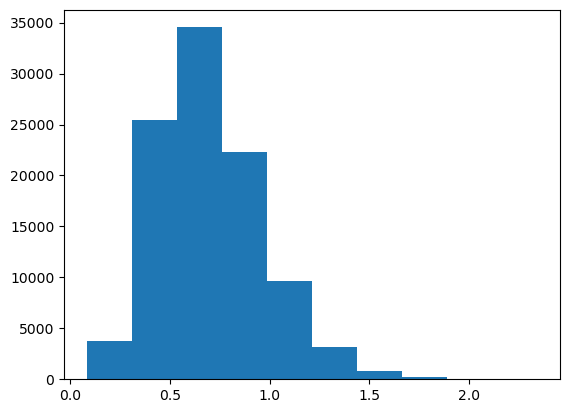

In [19]:
plt.hist(x_total)
plt.show()